<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Sampling-of-Tyrosine-Chi1-angle-in-MD" data-toc-modified-id="Sampling-of-Tyrosine-Chi1-angle-in-MD-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Sampling of Tyrosine Chi1 angle in MD</a></span></li><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Importing-Features" data-toc-modified-id="Importing-Features-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Importing Features</a></span></li><li><span><a href="#Binary-Classifier" data-toc-modified-id="Binary-Classifier-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Binary Classifier</a></span></li><li><span><a href="#Plotting-coefficients" data-toc-modified-id="Plotting-coefficients-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Plotting coefficients</a></span></li><li><span><a href="#Plumed-input" data-toc-modified-id="Plumed-input-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Plumed input</a></span></li><li><span><a href="#Classifier-as-CV-(driver-output-from-MD)" data-toc-modified-id="Classifier-as-CV-(driver-output-from-MD)-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Classifier as CV (driver output from MD)</a></span></li><li><span><a href="#Metadynamics" data-toc-modified-id="Metadynamics-0.8"><span class="toc-item-num">0.8&nbsp;&nbsp;</span>Metadynamics</a></span></li></ul></li></ul></div>

## Sampling of Tyrosine Chi1 angle in MD

**4 independent MD simulations. Just showing one example. We can see that the MD simulation didn't sample the flipped state (+/- 3 radian). See the paper https://www.biorxiv.org/content/10.1101/2020.04.27.062539v1 for more details**

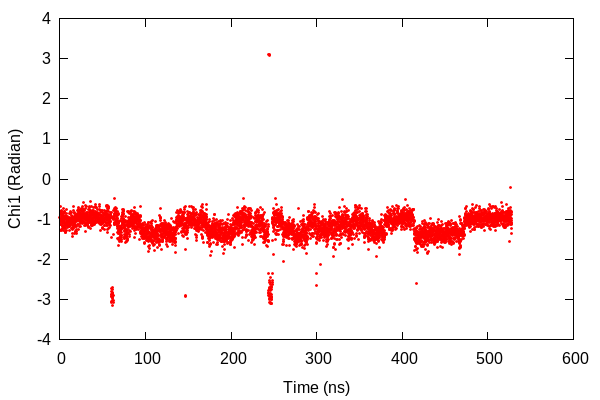


set xlabel 'Time (ns)'
set ylabel 'Chi1 (Radian)'

set output '/tmp/gnuplot-inline-1598867205.1241312.319604069441.png'
p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/COLVAR_extra' every 100 u ($1/1000):10 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [1]:
%gnuplot inline pngcairo font "Arial,12" size 600,400

set xlabel 'Time (ns)'
set ylabel 'Chi1 (Radian)'

p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/COLVAR_extra' every 100 u ($1/1000):10 w p ps 0.3 pt 7 lc 1 notitle

**Free Energy surface along Chi1 and Chi2 of Tyrosine.**

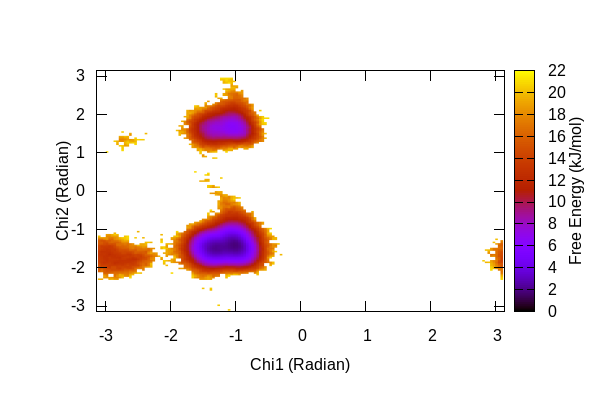

reset
set xlabel 'Chi1 (Radian)'
set ylabel 'Chi2 (Radian)'
set xrange [-3.14:3.14]
set yrange [-3.14:3.14]

set cblabel 'Free Energy (kJ/mol)'

set pm3d map

set output '/tmp/gnuplot-inline-1598867274.3978186.293450967780.png'
sp '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/fes_chi.dat' u 1:2:($3-12) notitle






gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [2]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1 (Radian)'
set ylabel 'Chi2 (Radian)'
set xrange [-3.14:3.14]
set yrange [-3.14:3.14]

set cblabel 'Free Energy (kJ/mol)'

set pm3d map

sp '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver2/Chi_angles/fes_chi.dat' u 1:2:($3-12) notitle

## Importing modules

In [1]:
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mdtraj as md
from msmbuilder.utils import load,dump

## Importing Features

In [4]:
plot_feat = load("../Plasmepsin/Norm-flipped/raw_features.pkl")
train_feat = load("../Plasmepsin/Norm-flipped/features.pkl")

In [5]:
df = load("../Plasmepsin/Norm-flipped/feature_descriptor.pkl")

In [6]:
df

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[15, 17, 19, 22]",chi1,Dihedral,sin,[75],[GLU],[76]
1,"[30, 32, 34, 37]",chi1,Dihedral,sin,[76],[MET],[77]
2,"[47, 49, 51, 54]",chi1,Dihedral,sin,[77],[ASN],[78]
3,"[61, 63, 65, 68]",chi1,Dihedral,sin,[78],[TYR],[79]
4,"[82, 84, 86, 88]",chi1,Dihedral,sin,[79],[VAL],[80]
5,"[98, 100, 102, 105]",chi1,Dihedral,sin,[80],[SER],[81]
6,"[116, 118, 120, 126]",chi1,Dihedral,sin,[82],[THR],[83]
7,"[130, 132, 134, 136]",chi1,Dihedral,sin,[83],[VAL],[84]
8,"[146, 148, 150, 153]",chi1,Dihedral,sin,[84],[SER],[85]
9,"[15, 17, 19, 22]",chi1,Dihedral,cos,[75],[GLU],[76]


**Plotting the dataframe shows you that index 12 corresonds to cos(Chi1) of Tyr79**

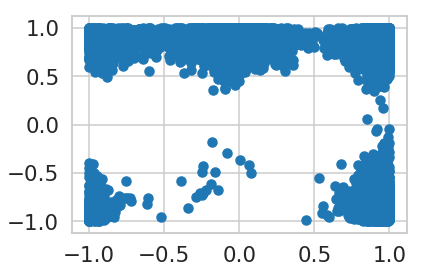

In [7]:
scatter(np.vstack(plot_feat)[:,0],np.vstack(plot_feat)[:,1])

## Binary Classifier

**In this case I will use Passive Agressive Classifier. I suggest you to play with other classifiers**

In [8]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [10]:
X=np.vstack(plot_feat)
train_X=np.vstack(train_feat)

train_Y=np.concatenate([np.zeros(len(plot_feat[0])),
            np.ones(len(plot_feat[0]))])
if not os.path.isfile("./pasag_model_plm.pkl"):
    train =True 
else:
    clf = load("./pasag_model_plm.pkl")
    train =False
if train:
    clf = PassiveAggressiveClassifier(max_iter=1000)
    clf.fit(train_X, train_Y)

In [11]:
if train:
    from msmbuilder.utils import dump
    dump(clf,"./pasag_model_plm.pkl")

In [12]:
clf = load("./pasag_model_plm.pkl")

## Plotting coefficients

Text(0, 0.5, 'Pasag-Coeff')

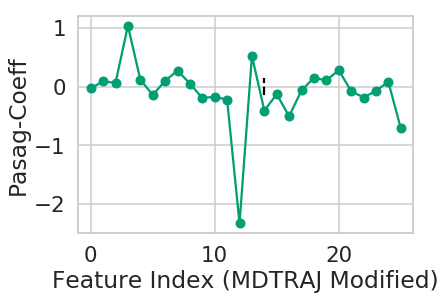

In [13]:
clr_plt = sns.color_palette("colorblind")
plot(clf.coef_.T,marker='o',c=clr_plt[2])
vlines(14,-.15,0.15,linestyles='dashed')
vlines(50,-.15,0.15,linestyles='dashed')
xlim([-1,26])
xlabel("Feature Index (MDTRAJ Modified)")
ylabel(r'Pasag-Coeff')

**One can see that Feature 12 and 3 get most weight during the training process.Comparing with df output we can say these two features belong to Chi 1 angles of Tyr79**

In [14]:
nx =ny=50
lim_x = lim_y = np.linspace(-1,1,nx)

In [15]:
coeff = ",".join([str(i) for i in clf.coef_[0]])

In [16]:
coeff

'-0.0281429762273,0.0903126235051,0.0652990220764,1.04089763536,0.119243184825,-0.141402864681,0.101711830549,0.272587504243,0.0538839789119,-0.195720041713,-0.170163983073,-0.225181244915,-2.33633958347,0.525139134732,-0.407610716134,-0.128911542962,-0.505247862078,-0.0634150725105,0.152655056558,0.105882478327,0.282076038485,-0.0749512587392,-0.185569822134,-0.0711826144214,0.0831844296232,-0.707499496348'

In [17]:
w_norm = np.linalg.norm(clf.coef_)
func="(x+%s)/%s"%(str(clf.intercept_[0]),str(w_norm))
func

'(x+0.15127357128)/2.85996647949'

## Plumed input

## Classifier as CV (driver output from MD)

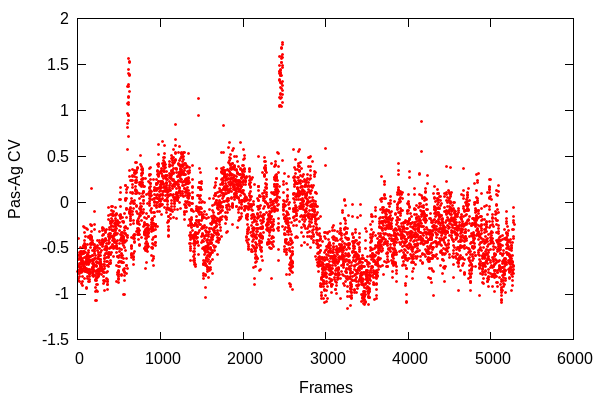

reset
set xlabel 'Frames'
set ylabel 'Pas-Ag CV'

set output '/tmp/gnuplot-inline-1598868071.7392888.888673893585.png'
p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver-pas-ag-CV/COLVAR' u 1:2 w p ps 0.3 pt 7 lc 1 notitle






gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [1]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Frames'
set ylabel 'Pas-Ag CV'

p '~/Aurora/Plasmepsin_calculations/MD_calculations/TIP3P/Plasmepsin_tip3p/R1/Driver-pas-ag-CV/COLVAR' u 1:2 w p ps 0.3 pt 7 lc 1 notitle

## Metadynamics

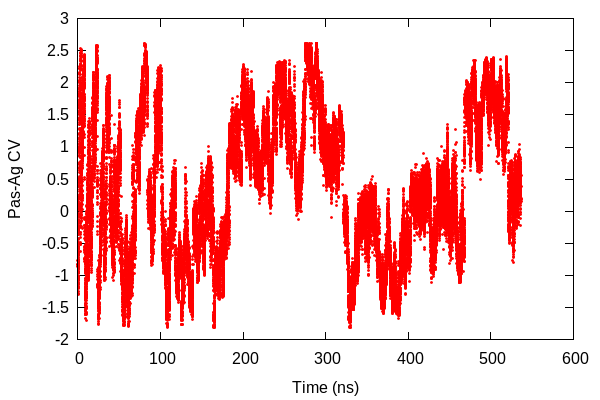

reset
set xlabel 'Time (ns)'
set ylabel 'Pas-Ag CV'

set output '/tmp/gnuplot-inline-1598868108.4600596.221676717477.png'
p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' every 10 u ($1/1000):2 w p ps 0.3 pt 7 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [2]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Pas-Ag CV'

p '~/Aurora/Plasmepsin_calculations/Metadynamics_normal_close/Norm_close/TIP3P/Pas-ag-normclosed/COLVAR' every 10 u ($1/1000):2 w p ps 0.3 pt 7 lc 1 notitle